In [63]:
#importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Data Collection and Data Preprocessing

In [64]:
cancer_data= sklearn.datasets.load_breast_cancer()

In [65]:
print(cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [66]:
df=pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)

In [67]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
df['label']=cancer_data.target

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [70]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [71]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [72]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


0 -->  Benign
1 --> Malignant

In [73]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [74]:
# sepearinfg data an labels
X= df.drop(columns ='label',axis=1)
Y=df['label']
print(X)
print('-----')
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## Data Standardization

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
standardization_data=scaler.fit_transform(X)

In [78]:
print(standardization_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [79]:
X= standardization_data

## Test Train and split

In [80]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Building the Neural Network

In [81]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [82]:
from keras.api._v2.keras import activations
#setting up the layers of the NN


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
]
)

In [83]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
#training the neural network
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 0.6169 - accuracy: 0.6088 - val_loss: 0.5167 - val_accuracy: 0.7609
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 0.8900 - val_loss: 0.3720 - val_accuracy: 0.8478
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.9193 - val_loss: 0.2908 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2566 - accuracy: 0.9389 - val_loss: 0.2441 - val_accuracy: 0.8913
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.9462 - val_loss: 0.2136 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1923 - accuracy: 0.9487 - val_loss: 0.1918 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1729 - accuracy: 0.9511 - val_loss: 0.1727 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

#Visualizing the Accuracy and Loss

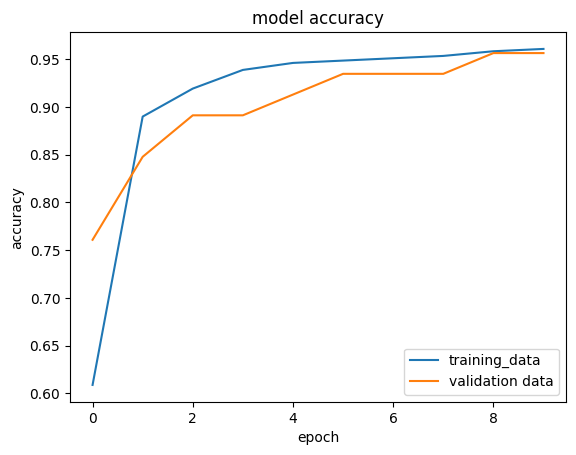

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training_data','validation data'],loc ='lower right')

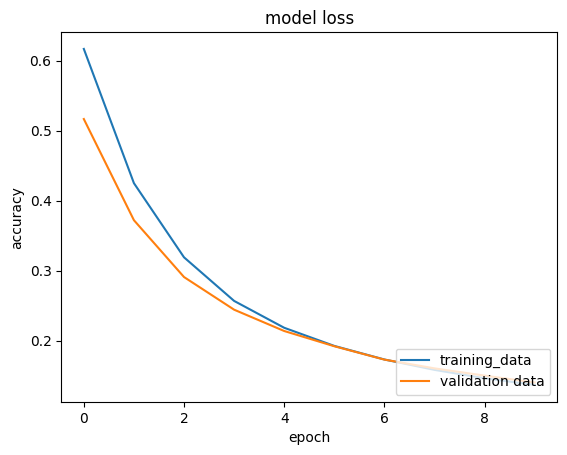

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training_data','validation data'],loc ='lower right')

In [87]:
#Accuracy of the model on test data
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.9649
0.9649122953414917


In [88]:
print(X_test.shape)
print(X_test[0])

(114, 30)
[ 0.46087218  0.22348024  0.43789164  0.30264351  0.4369358   0.30434211
  0.32518234  0.40498755  0.4504584   0.03294372 -0.20887241 -0.53696129
 -0.30793836 -0.17924967 -0.75835705 -0.09714378 -0.26703726 -0.51244257
 -0.34171971 -0.25112253  0.6814693   0.75116206  0.55517191  0.36462076
  1.00083503  1.232425    0.6016647   0.50695093  1.76701163  1.24431689]


In [89]:
Ypredict = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [90]:
print(Ypredict.shape)
print(Ypredict[0])

(114, 2)
[0.6391341  0.16023655]


In [91]:
print(Ypredict)

[[0.6391341  0.16023655]
 [0.15132645 0.9154338 ]
 [0.10953357 0.90015584]
 [0.16810033 0.9360172 ]
 [0.09875899 0.7927097 ]
 [0.30131656 0.573497  ]
 [0.23108701 0.8743343 ]
 [0.2530292  0.6338916 ]
 [0.24252048 0.815103  ]
 [0.11345883 0.8438238 ]
 [0.7769413  0.15911348]
 [0.36141795 0.03819977]
 [0.14041659 0.8876513 ]
 [0.30816492 0.86167115]
 [0.85757273 0.01973517]
 [0.5198779  0.5056119 ]
 [0.15841101 0.9162909 ]
 [0.08987112 0.9140701 ]
 [0.28707367 0.8049264 ]
 [0.44777635 0.6245413 ]
 [0.5283658  0.49324083]
 [0.74388975 0.0980843 ]
 [0.95138025 0.10596986]
 [0.33820063 0.84457624]
 [0.34997824 0.72407055]
 [0.19819361 0.8589776 ]
 [0.56511205 0.18551666]
 [0.92057985 0.14770994]
 [0.24694078 0.7124726 ]
 [0.14932893 0.8926039 ]
 [0.00380469 0.3323371 ]
 [0.16655976 0.8219575 ]
 [0.08834081 0.5574591 ]
 [0.36396325 0.6080507 ]
 [0.28759006 0.802811  ]
 [0.8685577  0.04205501]
 [0.80738956 0.19180234]
 [0.06617048 0.5618004 ]
 [0.99432844 0.03523555]
 [0.92614555 0.16875848]


model.predict() gives the prediction probability of each class of the data point

In [92]:
#converting the prediction probability of class label

Ypredict_labels= [np.argmax(i) for i in Ypredict]
print(Ypredict_labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]


## Building the predictive system

In [93]:
import warnings
input_data=(20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)

#changing the input into numpy array

input_data_as_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one point
input_data_reshape= input_data_as_array.reshape(1,-1)

#standardizing the input data
input_data_standardizied =scaler.transform(input_data_reshape)

prediction = model.predict(input_data_standardizied)
print(prediction)

prediction_label=[np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
  print("The Tumor is Malignant")
else:
  print('The Tumor is Benign')

warnings.filterwarnings("ignore")


1/1 [==============================] - 0s 22ms/step
[[0.8263587 0.0871667]]
[0]
The Tumor is Malignant
